# Python For Data Science // S.5 // Pandas Ep. 1

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nbaallelo.csv')

#Pustaka Pandas Python menyediakan beberapa fungsi serupa seperti read_json(), read_html(), dan read_sql_table().

In [ ]:
#Header	Definition
#gameorder	Play order of game in NBA history
#game_id	Unique ID for each game
#lg_id	Which league the game was played in
#_iscopy	Each row of data is tied to a single team for a single game, so _iscopy flags if this game_id has already occured for the opposing team in the same matchup
#year_id	Season id, named based on year in which the season ended
#date_game	Game date
#is_playoffs	Flag for playoff games
#team_id	Three letter code for team name, from Basketball Reference
#fran_id	Franchise id. Multiple team_ids can fall under the same fran_id due to name changes or moves. Interactive is grouped by fran_id.
#pts	Points scored by team
#elo_i	Team elo entering the game
#elo_n	Team elo following the game
#win_equiv	Equivalent number of wins in a 82-game season for a team of elo_n quality
#opp_id	Team id of opponent
#opp_fran	Franchise id of opponent
#opp_pts	Points scored by opponent
#opp_elo_i	Opponent elo entering the game
#opp_elo_n	Opponent elo following the game
#game_location	Home (H), away (A), or neutral (N)
#game_result	Win or loss for team in the team_id column
#forecast	Elo-based chances of winning for the team in the team_id column, based on elo ratings and game location
#notes	Additional information

In [4]:
len(df) #fungsi len() bawaan Python untuk melihat jumlah baris

126314

In [5]:
df.shape #.shape DataFrame untuk melihat dimensinya. Hasilnya adalah tuple yang berisi jumlah baris dan kolom

(126314, 23)

In [6]:
df.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [7]:
#dapat mengonfigurasi Pandas untuk menampilkan semua 23 kolom seperti ini:
pd.set_option("display.max.columns", None)

In [8]:
#decimalnya ubah menjadi dua aja dibelakang koma:
pd.set_option("display.precision", 2)

In [11]:
df.head(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN


## Displaying Data Types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

## Showing Basics Statistics

In [14]:
df.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


## Exploring Dataset

In [15]:
#memeriksa seberapa sering nilai tertentu muncul dalam kolom:
df["team_id"].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
INJ      60
PIT      60
DTF      60
TRH      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [25]:
df["team_id"].unique()

array(['TRH', 'NYK', 'CHS', 'DTF', 'WSC', 'BOS', 'PRO', 'PIT', 'STB',
       'CLR', 'PHW', 'BLB', 'INJ', 'FTW', 'MNL', 'ROC', 'TRI', 'DNN',
       'INO', 'SHE', 'WAT', 'AND', 'SYR', 'MLH', 'STL', 'DET', 'CIN',
       'LAL', 'CHP', 'CHZ', 'SFW', 'BAL', 'PHI', 'CHI', 'SEA', 'OAK',
       'ANA', 'SDR', 'KEN', 'INA', 'DNR', 'DLC', 'HSM', 'NOB', 'MNM',
       'NJA', 'PTP', 'ATL', 'MIL', 'PHO', 'NYA', 'MMF', 'MNP', 'LAS',
       'CAR', 'WSA', 'BUF', 'CLE', 'UTS', 'FLO', 'PTC', 'POR', 'VIR',
       'TEX', 'MMP', 'HOU', 'GSW', 'KCO', 'MMT', 'SDA', 'CAP', 'SAA',
       'NOJ', 'DNA', 'SSL', 'MMS', 'WSB', 'KCK', 'SDS', 'IND', 'NYN',
       'DEN', 'SAS', 'NJN', 'SDC', 'UTA', 'DAL', 'LAC', 'SAC', 'CHH',
       'MIA', 'MIN', 'ORL', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH', 'CHA',
       'NOK', 'OKC', 'BRK', 'NOP', 'CHO'], dtype=object)

In [16]:
df["fran_id"].value_counts() 

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Denver       

In [17]:
#Tampaknya tim bernama "Lakers" memainkan 6024 pertandingan,
#tetapi hanya 5078 yang dimainkan oleh Los Angeles Lakers.
#Cari tahu siapa tim "Lakers" lainnya:

df.loc[df["fran_id"] == "Lakers", "team_id"].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

In [18]:
#Minneapolis Lakers ("MNL") memainkan 946 pertandingan.
#Kita bahkan dapat mengetahui kapan mereka memainkan game-game itu:

df.loc[df["team_id"] == "MNL", "date_game"].min()

'1/1/1949'

In [19]:
df.loc[df["team_id"] == "MNL", "date_game"].max()

'4/9/1959'

In [22]:
df.loc[df["team_id"] == "MNL", "date_game"].agg(("min", "max"))

#Selebihnya bisa cek di browser dg keyword: 'pandas aggregate functions'

min    1/1/1949
max    4/9/1959
Name: date_game, dtype: object

In [23]:
#Sepertinya Minneapolis Lakers dimainkan main tahun 1949 dan 1959.
#Itu menjelaskan mengapa kita mungkin tidak mengenali tim ini!

In [24]:
#banyak poin yang telah dicetak Boston Celtics selama semua pertandingan:

df.loc[df["team_id"] == "BOS", "pts"].sum()

626484

## Understanding Series Objects

In [26]:
#Struktur data Python yang paling dasar adalah list, yang juga merupakan titik awal yang baik untuk mengenal objek pandas.Series.
#Buat objek Series baru menggunakan list:

revenues = pd.Series([5555, 7000, 1980])

In [ ]:
#Objek Series mempunyai dua komponen:
# A sequence of values
# A sequence of identifiers, which is the index

In [27]:
#Kalian dapat mengakses komponen ini masing-masing dengan .values dan.index:
revenues

0    5555
1    7000
2    1980
dtype: int64

In [28]:
#revenues.values mengembalikan nilai dalam Seri,
#sedangkan revenues.index mengembalikan indeks posisi.

revenues.values

array([5555, 7000, 1980], dtype=int64)

In [29]:
revenues.index

RangeIndex(start=0, stop=3, step=1)

In [45]:
type(revenues)

pandas.core.series.Series

In [30]:
#Meskipun Pandas dibuat di atas NumPy, perbedaan yang signifikan terletak pada pengindeksannya.
#Sama seperti array NumPy, Pandas Series juga memiliki indeks integer yang ditentukan secara implisit.
#Indeks implisit ini menunjukkan posisi elemen dalam Series.

#Namun, Series juga dapat memiliki jenis indeks yang berubah-ubah.
#kita menganggap indeks eksplisit ini sebagai label untuk baris tertentu:

city_revenues = pd.Series(
    [4200, 8000, 6500],
    index=["Amsterdam", "Toronto", "Tokyo"]
)
city_revenues

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

In [31]:
#Di sini, indeks adalah daftar nama kota yang diwakili oleh string.
#Kita mungkin telah memperhatikan bahwa dictionaries Python menggunakan indeks string juga,
#dan ini adalah analogi yang berguna untuk diingat! Kita dapat menggunakan blok kode di atas untuk membedakan antara dua jenis Series:
# revenues: This Series behaves like a Python list because it only has a positional index.
# city_revenues: This Series acts like a Python dictionary because it features both a positional and a label index.

#Berikut cara membuat Series dengan indeks label dari dictionary Python:

city_employee_count = pd.Series({"Amsterdam": 5, "Tokyo": 8})
city_employee_count

Amsterdam    5
Tokyo        8
dtype: int64

In [32]:
#Dictionary keys menjadi indeks, dan nilai dictionary adalah nilai Series.

#Sama seperti dictionaries, Series juga mendukung .keys() dan keyword in:

city_employee_count.keys()

Index(['Amsterdam', 'Tokyo'], dtype='object')

In [33]:
"Tokyo" in city_employee_count

True

In [34]:
"New York" in city_employee_count

False

## Understanding DataFrame Objects

In [ ]:
#Meskipun Series adalah struktur data yang cukup kuat, ia memiliki keterbatasan.
#Misalnya, kita hanya dapat menyimpan satu atribut per kunci.
#Seperti yang kita lihat dengan kumpulan data nba, yang menampilkan 23 kolom,
#pustaka Pandas Python memiliki lebih banyak hal untuk ditawarkan dengan DataFrame-nya.
#Struktur data ini adalah sequence objek kalian yang memiliki indeks yang sama.

In [36]:
#Jika kita telah mengikuti contoh Series diatas, kita seharusnya sudah memiliki dua objek Series dengan cities sebagai kuncinya:
# city_revenues
# city_employee_count

#Kita dapat menggabungkan objek-objek ini ke dalam DataFrame dengan memberikan dictionary di konstruktor.
#Dictionary keys akan menjadi nama kolom, dan nilainya akan berisi objek Series:

city_data = pd.DataFrame({
    "revenue": city_revenues,
    "employee_count": city_employee_count
})
city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN


In [37]:
#Perhatikan bagaimana Pandas mengganti nilai employee_count yang hilang untuk Toronto dengan NaN.

#Indeks DataFrame baru adalah gabungan dari dua indeks Series:

city_data.index

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [38]:
#Sama seperti Series, DataFrame juga menyimpan nilainya dalam array NumPy:

city_data.values

array([[4.2e+03, 5.0e+00],
       [6.5e+03, 8.0e+00],
       [8.0e+03,     nan]])

In [39]:
#Kalian juga dapat merujuk ke 2 dimensi DataFrame sebagai axes:

city_data.axes

[Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object'),
 Index(['revenue', 'employee_count'], dtype='object')]

In [40]:
city_data.axes[0]

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [41]:
city_data.axes[1]

#Axis bertanda 0 adalah indeks baris, dan axis bertanda 1 adalah indeks kolom.
#Terminologi ini penting untuk diketahui karena kita akan menemukan beberapa metode DataFrame yang menerima parameter axis.

Index(['revenue', 'employee_count'], dtype='object')

In [42]:
#DataFrame juga merupakan struktur data seperti dictionary,
#sehingga juga mendukung .keys() dan keyword in.Namun, untuk DataFrame,
#hal ini TIDAK TERKAIT dengan indeks, tetapi dengan kolom:

city_data.keys()

Index(['revenue', 'employee_count'], dtype='object')

In [43]:
"Amsterdam" in city_data #karena ini merupakan indeks

False

In [44]:
"revenue" in city_data #karena benar ini kolom

True

In [46]:
#Karena kita tidak menentukan kolom indeks saat kalian membaca di file CSV,
#Pandas telah menetapkan RangeIndex ke DataFrame:

df.index

RangeIndex(start=0, stop=126314, step=1)

In [47]:
#df, seperti semua objek DataFrame, memiliki dua axes:

df.axes

[RangeIndex(start=0, stop=126314, step=1),
 Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
        'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
        'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
        'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
       dtype='object')]

In [48]:
#Kita dapat memeriksa keberadaan kolom dengan .keys():

"points" in df.keys()

False

In [49]:
"pts" in df.keys() #Kolom tersebut disebut dengan "pts", bukan "points".

True

## Accessing Series Elements

In [50]:
#Kita juga dapat menggunakan operator pengindeksan ([]) untuk Series juga.

#Using the Indexing Operator
#Ingatlah bahwa Series memiliki dua indeks:
# A positional or implicit index, which is always a RangeIndex
# A label or explicit index, which can contain any hashable objects

city_revenues["Toronto"]

8000

In [51]:
city_revenues[1]

8000

In [52]:
#kita juga dapat menggunakan indeks dan slicing negatif, seperti yang kita lakukan untuk list:

city_revenues[-1]

6500

In [53]:
city_revenues[1:]

Toronto    8000
Tokyo      6500
dtype: int64

In [54]:
city_revenues["Toronto":]

Toronto    8000
Tokyo      6500
dtype: int64

In [55]:
#Operator pengindeksan ([]) memang mudah digunakan, tetapi ada peringatan.
#Bagaimana jika labelnya juga angka? Katakanlah kita harus bekerja dengan objek Series seperti ini:

colors = pd.Series(
    ["red", "purple", "blue", "green", "yellow"],
    index=[1, 2, 3, 5, 8]
)
colors

1       red
2    purple
3      blue
5     green
8    yellow
dtype: object

In [56]:
#Apakah output dari colors[1]? Untuk INDEKS POSISI, colors[1] adalah "ungu".
#Namun, jika kalian menggunakan INDEKS LABEL/NAMA, maka colors[1] mengacu pada "merah".

#Untuk menghindari kebingungan, pustaka Pandas Python menyediakan dua metode akses data:
# .loc refers to the label/nama index.
# .iloc refers to the positional index.
#Metode akses data ini jauh lebih mudah dibaca:

colors.loc[1]

'red'

In [57]:
colors.iloc[1]

'purple'

In [58]:
#.loc dan .iloc juga mendukung fitur yang kalian harapkan dari operator pengindeksan, seperti slicing.
#Namun, metode akses data ini memiliki perbedaan penting. Sementara .iloc mengecualikan elemen penutup, .loc menyertakannya. Lihatlah blok kode ini:

# Return the elements with the implicit index: 1, 2

colors.iloc[1:3] #indeks posisi 3 dikecualikan

2    purple
3      blue
dtype: object

In [59]:
colors.loc[1:3] #Di sisi lain, .loc menyertakan elemen penutup

1       red
2    purple
3      blue
dtype: object

In [60]:
colors.loc[3:8]

3      blue
5     green
8    yellow
dtype: object

In [63]:
#Kita juga dapat menyertakan indeks posisi negatif ke .iloc:

colors.iloc[-2] #Kita mulai dari akhir Series dan mengembalikan elemen kedua.

'green'

In [ ]:
#Kita dapat menggunakan blok kode di atas untuk membedakan antara dua perilaku Series:
# You can use .iloc on a Series similar to using [] on a list.
# You can use .loc on a Series similar to using [] on a dictionary.

## Accessing DataFrame Elements

In [64]:
#Karena DataFrame terdiri dari objek Series, kita dapat menggunakan alat yang sama untuk mengakses elemennya.
#Perbedaan krusialnya adalah dimensi tambahan dari DataFrame.

#Jika kalian menganggap DataFrame sebagai dictionary yang nilainya adalah Series,
#maka masuk akal jika kalian dapat mengakses kolomnya dengan operator pengindeksan:

city_data["revenue"]

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

In [65]:
#Jika nama kolom adalah string, maka kita juga dapat menggunakan akses attribute-style dengan dot notation:

city_data.revenue #city_data["revenue"] dan city_data.revenue mengembalikan output yang sama.

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

In [66]:
#Ada satu situasi di mana mengakses elemen DataFrame dengan notasi titik mungkin tidak berfungsi
#atau dapat menimbulkan kesalahan. Adalah saat nama kolom bertepatan dengan atribut DataFrame atau nama method:

toys = pd.DataFrame([
    {"name": "ball", "shape": "sphere"},
    {"name": "Rubik's cube", "shape": "cube"}
])

In [67]:
toys["shape"]

0    sphere
1      cube
Name: shape, dtype: object

In [68]:
toys.shape #mengembalikan bentuk DataFrame nya

(2, 2)

In [71]:
#sebaiknya hanya menggunakan pengaksesan bergaya atribut dalam sesi interaktif atau untuk operasi READ.
#Kita TIDAK BOLEH menggunakannya untuk kode produksi atau untuk memanipulasi data (seperti menentukan kolom baru).

#Mirip dengan Series, DataFrame juga menyediakan metode akses data .loc and .iloc.
#Ingat, .loc menggunakan label dan .iloc indeks posisi:

city_data.loc["Amsterdam":"Toronto"]
#selects the rows with label indices from "Amsterdam" to "Toronto". Remember, .loc is inclusive.

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN


In [79]:
city_data.loc["Tokyo": "Toronto"]
#selects the rows with label indices from "Tokyo" to "Toronto". Remember, .loc is inclusive.

,revenue,employee_count
Tokyo,6500,8.0
Toronto,8000,NaN


In [76]:
city_data.iloc[0]
#selects the row with the positional index 0, which is "Amsterdam".

revenue           4200.0
employee_count       5.0
Name: Amsterdam, dtype: float64

In [80]:
#Sekarang, saatnya berlatih dengan data yang lebih besar! 

df.iloc[-2]

gameorder               63157
game_id          201506170CLE
lg_id                     NBA
_iscopy                     0
year_id                  2015
date_game           6/16/2015
seasongame                102
is_playoffs                 1
team_id                   CLE
fran_id             Cavaliers
pts                        97
elo_i                 1700.74
elo_n                 1692.09
win_equiv               59.29
opp_id                    GSW
opp_fran             Warriors
opp_pts                   105
opp_elo_i             1813.63
opp_elo_n             1822.29
game_location               H
game_result                 L
forecast                 0.48
notes                     NaN
Name: 126312, dtype: object

In [81]:
df.loc[5555:5559, ["fran_id", "opp_fran", "pts", "opp_pts"]]
#kita memisahkan parameter dengan koma (,). Parameter pertama, "5555" : "5559,", menyatakan untuk memilih semua baris di antara dua label tersebut. Parameter kedua muncul setelah koma dan mengatakan untuk memilih kolom "fran_id", "opp_fran", "pts", "opp_pts".

,fran_id,opp_fran,pts,opp_pts
5555,Pistons,Warriors,83,56
5556,Celtics,Knicks,95,74
5557,Knicks,Celtics,74,95
5558,Kings,Sixers,81,86
5559,Sixers,Kings,86,81


## Querying Your Dataset

In [83]:
#Kita telah melihat cara mengakses subsets kumpulan data yang sangat besar berdasarkan indeksnya.
#Sekarang, kita akan MEMILIH BARIS BERDASARKAN KOLOM di kolom kumpulan data kalian untuk query data Anda.
#Misalnya, kita dapat membuat DataFrame baru yang hanya berisi game yang dimainkan setelah 2010:

current_decade = df[df["year_id"] > 2010]
current_decade

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
113656,56829,201010260BOS,NBA,1,2011,10/26/2010,1,0,MIA,Heat,80,1547.36,1543.16,45.14,BOS,Celtics,88,1625.10,1629.30,A,L,0.26,NaN
113657,56829,201010260BOS,NBA,0,2011,10/26/2010,1,0,BOS,Celtics,88,1625.10,1629.30,53.75,MIA,Heat,80,1547.36,1543.16,H,W,0.74,NaN
113658,56830,201010260LAL,NBA,1,2011,10/26/2010,1,0,HOU,Rockets,110,1504.20,1502.60,40.90,LAL,Lakers,112,1647.60,1649.20,A,L,0.20,NaN
113659,56830,201010260LAL,NBA,0,2011,10/26/2010,1,0,LAL,Lakers,112,1647.60,1649.20,55.61,HOU,Rockets,110,1504.20,1502.60,H,W,0.80,NaN
113660,56831,201010260POR,NBA,1,2011,10/26/2010,1,0,PHO,Suns,92,1643.02,1630.62,53.88,POR,Trailblazers,106,1552.81,1565.22,A,L,0.49,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN


In [86]:
#supaya tidak mengganggu data asli bisa di copy aja:

current_decade = df[df["year_id"] > 2010].copy()
current_decade

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
113656,56829,201010260BOS,NBA,1,2011,10/26/2010,1,0,MIA,Heat,80,1547.36,1543.16,45.14,BOS,Celtics,88,1625.10,1629.30,A,L,0.26,NaN
113657,56829,201010260BOS,NBA,0,2011,10/26/2010,1,0,BOS,Celtics,88,1625.10,1629.30,53.75,MIA,Heat,80,1547.36,1543.16,H,W,0.74,NaN
113658,56830,201010260LAL,NBA,1,2011,10/26/2010,1,0,HOU,Rockets,110,1504.20,1502.60,40.90,LAL,Lakers,112,1647.60,1649.20,A,L,0.20,NaN
113659,56830,201010260LAL,NBA,0,2011,10/26/2010,1,0,LAL,Lakers,112,1647.60,1649.20,55.61,HOU,Rockets,110,1504.20,1502.60,H,W,0.80,NaN
113660,56831,201010260POR,NBA,1,2011,10/26/2010,1,0,PHO,Suns,92,1643.02,1630.62,53.88,POR,Trailblazers,106,1552.81,1565.22,A,L,0.49,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN


In [84]:
current_decade.shape

(12658, 23)

In [85]:
#kita masih memiliki seluruh 23 kolom, tetapi DataFrame baru ini hanya terdiri dari baris-baris yang nilai dalam kolom "year_id" lebih besar dari 2010.
#kita juga dapat memilih baris di mana field tertentu yang BUKAN NULL

games_with_notes = df[df["notes"].notnull()] #bisa juga .notna()
games_with_notes.shape

(5424, 23)

In [88]:
#Kita bahkan dapat mengakses nilai dari tipe data objek sebagai str dan melakukan metode string padanya:

end_name_ers = df[df["fran_id"].str.endswith("ers")]
end_name_ers.shape
#.str.endswith() untuk memfilter kumpulan data kita dan menemukan semua game yang nama tim tuan rumah diakhiri dengan "ers".

(27797, 23)

In [89]:
#Lakukan pencarian untuk game Baltimore dimana kedua tim mencetak lebih dari 100 poin. Dan kita harus exclude duplicates:

df[
    (df["_iscopy"] == 0) &
    (df["pts"] > 100) &
    (df["opp_pts"] > 100) &
    (df["team_id"] == "BLB")
]
#menggunakan df["_iscopy"] == 0 untuk hanya menyertakan entri yang bukan salinan/duplikat

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.94,1419.43,38.56,MNL,Lakers,115,1637.99,1640.49,H,L,0.34,NaN
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.67,1356.65,25.80,BOS,Celtics,105,1591.14,1563.17,H,W,0.28,NaN
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.83,1346.36,24.88,MNL,Lakers,112,1665.44,1668.91,H,L,0.22,NaN
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.52,1282.24,19.58,NYK,Knicks,113,1649.15,1651.44,H,L,0.18,at Boston MA
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.75,1301.97,20.74,BOS,Celtics,111,1591.49,1593.27,H,L,0.25,at Worcester MA


In [90]:
#query lain dengan beberapa kriteria. Pada musim semi 1992, kedua tim dari Los Angeles harus memainkan pertandingan kandang di lapangan lain.
#Buat kueri set data untuk menemukan dua game tersebut. Kedua tim memiliki ID yang dimulai dengan "LA".

#kita dapat menggunakan .str untuk menemukan ID tim yang dimulai dengan "LA",
#dan dapat berasumsi bahwa game yang tidak biasa seperti itu akan memiliki "notes":

df[
    (df["_iscopy"] == 0) &
    (df["team_id"].str.startswith("LA")) &
    (df["year_id"] == 1992) &
    (df["notes"].notnull())
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
68901,34451,199205030LAC,NBA,0,1992,5/3/1992,86,1,LAC,Clippers,115,1546.90,1556.0,47.89,UTA,Jazz,107,1647.51,1638.41,H,W,0.50,"at Anaheim, CA (Anaheim Convention Center)"
68903,34452,199205030LAL,NBA,0,1992,5/3/1992,86,1,LAL,Lakers,76,1489.65,1474.4,39.40,POR,Trailblazers,102,1655.12,1670.37,H,L,0.41,"at Las Vegas, NV"


## Grouping and Aggregating Your Data

In [95]:
#Series memiliki lebih dari 20 metode berbeda untuk menghitung statistik deskriptif. Berikut beberapa contohnya:

city_revenues.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64>

In [96]:
city_revenues.max

<bound method NDFrame._add_numeric_operations.<locals>.max of Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64>

In [98]:
city_revenues.agg(("sum","max","min","mean"))

sum     18700.00
max      8000.00
min      4200.00
mean     6233.33
dtype: float64

In [101]:
#Ingat, kolom DataFrame sebenarnya adalah objek Series.
#Untuk alasan ini, dapat menggunakan fungsi yang sama di kolom nba:

points = df["pts"]
points

0          66
1          68
2          63
3          47
4          33
         ... 
126309     82
126310    104
126311     91
126312     97
126313    105
Name: pts, Length: 126314, dtype: int64

In [102]:
points.sum()

12976235

In [103]:
#DataFrame dapat memiliki beberapa kolom, yang memperkenalkan kita terhadap kemungkinan baru untuk agregasi,
#seperti grouping:

df.head(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN


In [105]:
df.groupby("fran_id", sort=False)["pts"].sum().head()

fran_id
Huskies       3995
Knicks      582497
Stags        20398
Falcons       3797
Capitols     22387
Name: pts, dtype: int64

In [106]:
#Secara default, Pandas mengurutkan keys grup selama memanggil ke .groupby().
#Jika tidak ingin mengurutkan, berikan sort=False. Parameter ini dapat menghasilkan peningkatan kinerja.

#kita juga dapat mengelompokkan beberapa kolom:

df[
    (df["fran_id"] == "Spurs") &
    (df["year_id"] > 2010)
].groupby(["year_id", "game_result"])["game_id"].count() #groupby nya yg di count

year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

In [107]:
#Kita dapat mempraktikkan dasar-dasar ini dengan latihan. Coba lihat musim Golden State Warriors 2014-15 (year_id: 2015).
#Berapa banyak kemenangan dan kekalahan yang mereka cetak selama musim reguler dan babak playoff?
#Pertama, kita dapat mengelompokkan berdasarkan "is_playoffs", lalu berdasarkan result:

df[
    (df["fran_id"] == "Warriors") &
    (df["year_id"] == 2015)
].groupby(["is_playoffs", "game_result"])["game_id"].count() #groupby nya yg di count

#is_playoffs=0 menunjukkan hasil untuk musim reguler, dan is_playoffs=1 menunjukkan hasil untuk playoff.

is_playoffs  game_result
0            L              15
             W              67
1            L               5
             W              16
Name: game_id, dtype: int64

## Manipulating Columns

In [108]:
#kita dapat add dan drop kolom sebagai bagian dari fase cleaning data awal, atau nanti, berdasarkan insights analisis Anda.

nba = df.copy()
nba.shape

(126314, 23)

In [109]:
#kita dapat menentukan kolom baru berdasarkan yang sudah ada:

nba["difference"] = df.pts - df.opp_pts 
nba

#Di sini, kita menggunakan kolom "pts" dan "opp_pts" untuk membuat kolom baru yang disebut "difference

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,difference
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN,-2
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN,2
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN,16
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN,-16
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN,-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN,-21
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN,13
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN,-13
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN,-8


In [110]:
nba.shape

(126314, 24)

In [111]:
#mengganti nama kolom set data. Tampaknya "game_result" dan  "game_location" terlalu panjang, jadi ganti namanya:

renamed_nba = nba.rename(
    columns={"game_result": "result", "game_location": "location"}
) #.rename() mengembalikan DataFrame baru secara default

renamed_nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,location,result,forecast,notes,difference
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN,-2
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN,2
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN,16
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN,-16
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN,-17


In [112]:
#Jika ingin memanipulasi DataFrame asli secara langsung, maka .rename()juga menyediakan parameter inplace yang dapat kalian setel ke True.

elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]

In [114]:
nba.drop(elo_columns, inplace=True, axis=1) #axis=1 artinya kolomnya

In [115]:
nba.shape

(126314, 20)

## Specifying Data Types

In [116]:
#Pandas menetapkan tipe data ke setiap kolom berdasarkan nilainya

nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  win_equiv      126314 non-null  float64
 12  opp_id         126314 non-null  object 
 13  opp_fran       126314 non-null  object 
 14  opp_pts        126314 non-null  int64  
 15  game_location  126314 non-null  object 
 16  game_result    126314 non-null  object 
 17  forecast       126314 non-nul

In [117]:
#Sebagian besar kolom objek ini berisi teks arbitrer, tetapi ada juga beberapa kandidat untuk dilakukan konversi tipe data. Misalnya, lihat kolom date_game:

nba["date_game"] = pd.to_datetime(nba["date_game"])
#.to_datetime() untuk menetapkan semua tanggal game sebagai objek datetime.

In [118]:
#Kolom lain berisi teks yang sedikit lebih terstruktur. Kolom game_location hanya dapat memiliki tiga nilai berbeda:

nba["game_location"].nunique() #yg uniqeue

3

In [119]:
nba["game_location"].value_counts()

H    63138
A    63138
N       38
Name: game_location, dtype: int64

In [120]:
#Tipe data apa yang akan kita gunakan dalam database relasional untuk kolom seperti itu?
#kita mungkin tidak akan menggunakan tipe varchar, melainkan enum. Pandas menyediakan tipe data categorical untuk tujuan yang sama:

nba["game_location"] = pd.Categorical(nba["game_location"])

In [121]:
nba["game_location"].dtype

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

In [ ]:
#Data kategorikal memiliki beberapa keunggulan dibandingkan teks tidak terstruktur.
#Saat kita menentukan tipe data kategorikal, kita membuat validasi lebih mudah dan menghemat banyak memori,
#karena Pandas hanya akan menggunakan nilai unik secara internal. Semakin tinggi rasio nilai total terhadap nilai unik, semakin banyak penghematan ruang yang akan kalian dapatkan.

## Missing Values

In [122]:
#dapat dicek dengan:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [123]:
#kolom notes hanya memiliki 5424 nilai non-null. Itu berarti lebih dari 120.000 baris kumpulan data kalian memiliki nilai null di kolom ini.

#menghapus semua baris dengan nilai yang hilang menggunakan .dropna():

rows_without_missing_data = nba.dropna()

In [124]:
rows_without_missing_data.shape

(5424, 20)

In [126]:
rows_without_missing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5424 entries, 930 to 124863
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   gameorder      5424 non-null   int64         
 1   game_id        5424 non-null   object        
 2   lg_id          5424 non-null   object        
 3   _iscopy        5424 non-null   int64         
 4   year_id        5424 non-null   int64         
 5   date_game      5424 non-null   datetime64[ns]
 6   seasongame     5424 non-null   int64         
 7   is_playoffs    5424 non-null   int64         
 8   team_id        5424 non-null   object        
 9   fran_id        5424 non-null   object        
 10  pts            5424 non-null   int64         
 11  win_equiv      5424 non-null   float64       
 12  opp_id         5424 non-null   object        
 13  opp_fran       5424 non-null   object        
 14  opp_pts        5424 non-null   int64         
 15  game_location  54

In [127]:
#apabila data selain kolom notes penting, maka drop kolom notes saja:

data_without_missing_columns = nba.dropna(axis=1)

In [128]:
data_without_missing_columns.shape

(126314, 19)

In [129]:
#Jika ada nilai default yang berarti untuk use case kalian,
#kita juga dapat mengganti nilai yang hilang dengan:

data_with_default_notes = nba.copy()

In [130]:
data_with_default_notes["notes"].fillna(
    value="no notes at all",
    inplace=True
)

In [131]:
data_with_default_notes["notes"].describe()
#Di sini, kalian mengisi baris catatan kosong dengan string "no notes at all".

count              126314
unique                232
top       no notes at all
freq               120890
Name: notes, dtype: object

## Invalid Values

In [132]:
#Invalid values bisa lebih berbahaya daripada missing values.
#Seringkali, kita tetap dapat melakukan analisis data seperti yang diharapkan,
#tetapi hasil yang diperoleh aneh karena invalid values.
#Ini sangat penting jika kumpulan data kita sangat besar atau menggunakan entri manual.
#Nilai yang tidak valid seringkali lebih sulit untuk dideteksi,
#tetapi kita dapat menerapkan beberapa pemeriksaan dengan kueri dan agregasi.

#Satu hal yang dapat dilakukan adalah memvalidasi rentang data.
#Untuk ini, .describe()cukup berguna. Ingatlah bahwa ia mengembalikan keluaran berikut:

nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,win_equiv,opp_pts,forecast,difference
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,41.71,102.73,0.50,0.00
std,18231.93,0.5,17.58,25.38,0.24,14.81,10.63,14.81,0.22,13.37
min,1.00,0.0,1947.00,1.00,0.00,0.00,10.15,0.00,0.02,-68.00
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,34.10,93.00,0.33,-9.00
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,42.11,103.00,0.50,0.00
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,49.64,112.00,0.67,9.00
max,63157.00,1.0,2015.00,108.00,1.00,186.00,71.11,186.00,0.98,68.00


In [133]:
#year_id bervariasi antara 1947 dan 2015. Kedengarannya masuk akal.
#Bagaimana dengan pts? Bagaimana bisa minimumnya menjadi 0? Mari kita lihat game-game tersebut:

nba[nba["pts"] == 0]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,win_equiv,opp_id,opp_fran,opp_pts,game_location,game_result,forecast,notes,difference
26684,13343,197210260VIR,ABA,1,1973,1972-10-26,7,0,DNR,Nuggets,0,40.41,VIR,Squires,2,A,L,0.33,at Richmond VA; forfeit to VIR,-2


In [134]:
#Sepertinya game itu forfeited.
#Bergantung pada analisis kita, kita mungkin ingin menghapusnya dari dataset.

#Kadang-kadang sebuah nilai akan sepenuhnya realistis, tetapi tidak sesuai dengan nilai di kolom lain.

#Dalam kumpulan data NBA, nilai kolom pts, opp_pts dan game_result harus konsisten satu sama lain.
#kita dapat memeriksanya menggunakan atribut .empty:

nba[(nba["pts"] > nba["opp_pts"]) & (nba["game_result"] != 'W')].empty

True

In [ ]:
nba[(nba["pts"] < nba["opp_pts"]) & (nba["game_result"] != 'L')].empty

In [ ]:
#Untungnya, kedua kueri ini mengembalikan DataFrame kosong.
#Bersiaplah untuk kejutan setiap kali kali bekerja dengan kumpulan data mentah,
#terutama jika kumpulan data tersebut dikumpulkan dari sumber berbeda atau melalui pipeline yang rumit.
#kita mungkin melihat baris di mana team mencetak lebih banyak poin daripada lawannya, tetapi masih kalah.

## Combining Multiple Datasets

In [135]:
#Aspek lain dari data dunia nyata adalah sering kali data datang dalam beberapa bagian.
#Di bagian ini, kita akan mempelajari cara mengambil bagian-bagian tersebut dan
#menggabungkannya menjadi satu kumpulan data yang siap untuk dianalisis.

#Sebelumnya, kita menggabungkan dua objek Series ke dalam DataFrame berdasarkan indeksnya.
#Sekarang, kita akan mengambil satu langkah lebih jauh dan menggunakan .concat()
#untuk menggabungkan city_data dengan DataFrame lain. Misalkan kalian berhasil mengumpulkan beberapa data di dua kota lagi:

further_city_data = pd.DataFrame(
    {"revenue": [7000, 3400], "employee_count": [2, 2]},
    index=["New York", "Barcelona"]
)
further_city_data #DataFrame kedua ini berisi info tentang kota "New York" dan "Barcelona".

,revenue,employee_count
New York,7000,2
Barcelona,3400,2


In [136]:
city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN


In [138]:
#kita dapat menambahkan kota-kota ini ke city_data menggunakan .concat():

all_city_data = pd.concat([city_data, further_city_data], sort=False)
all_city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN
New York,7000,2.0
Barcelona,3400,2.0


In [144]:
#Secara default, concat()  menggabungkan sepanjang axis = 0. Dengan kata lain, concat menambahkan baris.
#kita juga dapat menggunakannya untuk menambahkan kolom dengan menyediakan parameter axis = 1:

city_countries = pd.DataFrame({
    "country": ["Holland", "Japan", "Holland", "Canada", "Spain"],
    "capital": [1, 1, 0, 0, 0]},
    index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"]
)
city_countries

,country,capital
Amsterdam,Holland,1
Tokyo,Japan,1
Rotterdam,Holland,0
Toronto,Canada,0
Barcelona,Spain,0


In [140]:
all_city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN
New York,7000,2.0
Barcelona,3400,2.0


In [146]:
cities = pd.concat([all_city_data, city_countries],sort=False)
cities

,revenue,employee_count,country,capital
Amsterdam,4200.0,5.0,NaN,NaN
Tokyo,6500.0,8.0,NaN,NaN
Toronto,8000.0,NaN,NaN,NaN
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,NaN,NaN
Amsterdam,NaN,NaN,Holland,1.0
Tokyo,NaN,NaN,Japan,1.0
Rotterdam,NaN,NaN,Holland,0.0
Toronto,NaN,NaN,Canada,0.0
Barcelona,NaN,NaN,Spain,0.0


In [147]:
cities = pd.concat([all_city_data, city_countries], axis=1, sort=False)
cities

,revenue,employee_count,country,capital
Amsterdam,4200.0,5.0,Holland,1.0
Tokyo,6500.0,8.0,Japan,1.0
Toronto,8000.0,NaN,Canada,0.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0


In [148]:
#perhatikan bagaimana Pandas menambahkan NaN untuk nilai yang hilang.

#Jika ingin menggabungkan hanya kota yang MUNCUL DI KEDUA objek DataFrame,
#maka kita dapat mengatur parameter join menjadi inner:

pd.concat([all_city_data, city_countries], axis=1, join="inner")

,revenue,employee_count,country,capital
Amsterdam,4200,5.0,Holland,1
Tokyo,6500,8.0,Japan,1
Toronto,8000,NaN,Canada,0
Barcelona,3400,2.0,Spain,0


In [155]:
#Meskipun paling mudah untuk menggabungkan data berdasarkan indeks, itu bukanlah satu-satunya cara.
#kita bisa menggunakan .merge() untuk mengimplementasikan operasi gabungan yang mirip dengan SQL:

countries = pd.DataFrame({
    "population_millions": [17, 127, 37],
    "continent": ["Europe", "Asia", "North America"]
},
    index=["Holland", "Japan", "Canada"]
)
countries

,population_millions,continent
Holland,17,Europe
Japan,127,Asia
Canada,37,North America


In [151]:
cities

,revenue,employee_count,country,capital
Amsterdam,4200.0,5.0,Holland,1.0
Tokyo,6500.0,8.0,Japan,1.0
Toronto,8000.0,NaN,Canada,0.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0


In [156]:
pd.merge(cities, countries, left_on="country", right_index=True)

#right_index=True berarti menampilkan data berdasarkan index df kedua/dikanan

,revenue,employee_count,country,capital,population_millions,continent
Amsterdam,4200.0,5.0,Holland,1.0,17,Europe
Rotterdam,NaN,NaN,Holland,0.0,17,Europe
Tokyo,6500.0,8.0,Japan,1.0,127,Asia
Toronto,8000.0,NaN,Canada,0.0,37,North America


In [157]:
#Perhatikan bahwa hasilnya hanya berisi kota-kota di mana negara tersebut dikenal dan muncul di DataFrame yang digabungkan.

#.merge() melakukan inner join secara default. Jika ingin memasukkan semua kota dalam hasil, maka perlu memberikan parameter how:

pd.merge(
    cities,
    countries,
    left_on="country",
    right_index=True,
    how="left"
)
#Dengan LEFT JOIN ini, kita akan melihat semua kota, termasuk kota yang tidak memiliki data negara.

,revenue,employee_count,country,capital,population_millions,continent
Amsterdam,4200.0,5.0,Holland,1.0,17.0,Europe
Tokyo,6500.0,8.0,Japan,1.0,127.0,Asia
Toronto,8000.0,NaN,Canada,0.0,37.0,North America
New York,7000.0,2.0,NaN,NaN,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0,NaN,NaN
Rotterdam,NaN,NaN,Holland,0.0,17.0,Europe


## Visualizing Your Pandas DataFrame

In [158]:
#Sertakan baris ini untuk menampilkan plot langsung di notebook:

%matplotlib inline

<AxesSubplot:xlabel='year_id'>

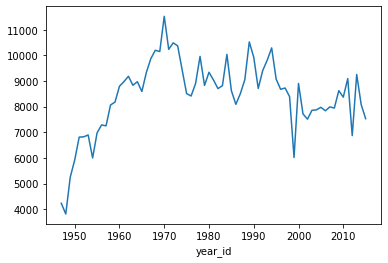

In [159]:
#Objek Series dan DataFrame memiliki metode .plot(), yang merupakan wrapper pada matplotlib.pyplot.plot().
#Secara default, syntax tersebut membuat line plot. Visualisasikan berapa banyak poin yang dicetak Knicks sepanjang musim:

nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

In [160]:
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum()

year_id
1947    4234
1948    3815
1949    5253
1950    5924
1951    6814
        ... 
2011    9097
2012    6872
2013    9259
2014    8084
2015    7535
Name: pts, Length: 69, dtype: int64

<AxesSubplot:xlabel='year_id'>

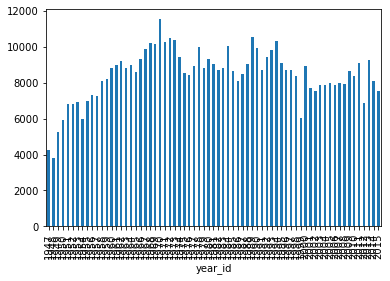

In [165]:
#kita juga dapat membuat jenis plot lain, seperti bar plot:

nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot(kind="bar")

<AxesSubplot:>

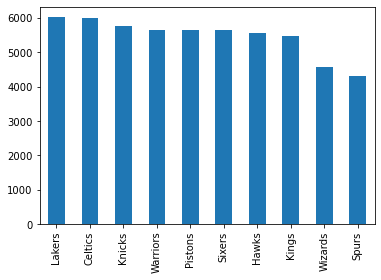

In [164]:
nba["fran_id"].value_counts().head(10).plot(kind="bar")

In [162]:
nba["fran_id"].value_counts().head(10)

Lakers      6024
Celtics     5997
Knicks      5769
Warriors    5657
Pistons     5650
Sixers      5644
Hawks       5572
Kings       5475
Wizards     4582
Spurs       4309
Name: fran_id, dtype: int64

In [ ]:
#Kalian dapat menggunakan beberapa argumen dibawah ini untuk membuat jenis plot yang berbeda dengan Pandas:

‘line’ : line plot (default)
‘bar’ : vertical bar plot
‘barh’ : horizontal bar plot
‘hist’ : histogram
‘box’ : boxplot
‘kde’ : Kernel Density Estimation plot
‘density’ : same as ‘kde’
‘area’ : area plot
‘pie’ : pie plot
‘scatter’ : scatter plot
‘hexbin’ : hexbin plot